In [15]:
# data handling
import numpy as np
import pandas as pd

# data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# feature selection
from sklearn.feature_selection import RFE

# machine learning algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# dimensionality reduction with PCA
from sklearn.decomposition import PCA

# accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# importing pathlib to handle paths to csv dataset
from pathlib import Path 

## Extracting the Data

In [40]:
# extracting data through the csv files
outlet_db = pd.read_csv('../Semifinal Round/Datasets/outlets_data.csv')
product_db = pd.read_csv('../Semifinal Round/Datasets/product_data.csv')
freezer_db = pd.read_csv('../Semifinal Round/Datasets/freezer_data.csv')
week_db = pd.read_csv('../Semifinal Round/Datasets/week_data.csv')
sales_db = pd.read_csv('../Semifinal Round/Datasets/sales_data.csv') 

#### Outlet Data

In [17]:
outlet_db

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [18]:
outlet_db.describe()

,area(sqft)
count,988.000000
mean,4288.656883
std,2451.617799
min,123.000000
25%,2325.750000
50%,3958.500000
75%,5836.000000
max,9950.000000


In [19]:
outlet_db.isnull().sum()

Outlet_ID     0
area(sqft)    0
dtype: int64

#### Product Data

In [20]:
product_db

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [21]:
product_db.describe()

,volume,price
count,10.000000,10.000000
mean,0.600000,605.000000
std,0.421637,534.628635
min,0.200000,90.000000
25%,0.200000,100.000000
50%,0.600000,555.000000
75%,1.000000,1100.000000
max,1.000000,1200.000000


In [44]:
product_db['price_per_volume'] = product_db['price'] / product_db['volume']
product_db

,pid,volume,product_name,price,price_per_volume
0,IP1,0.2,Vanilla Mini Cone,100,500.0
1,IP2,0.2,Chocolate Petite Bar,90,450.0
2,IP3,0.2,Strawberry Tiny Cup,110,550.0
3,IP4,0.2,Mint Bite-size Pop,100,500.0
4,IP5,0.2,Butter Pecan Small Stick,100,500.0
5,BP1,1.0,Chocolate Fudge Big Scoop,1200,1200.0
6,BP2,1.0,Moose Tracks Jumbo Cup,1100,1100.0
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150,1150.0
8,BP4,1.0,Rocky Road Mega Tub,1000,1000.0
9,BP5,1.0,Cookies and Cream Mega Tub,1100,1100.0


In [45]:
product_db

,pid,volume,product_name,price,price_per_volume
0,IP1,0.2,Vanilla Mini Cone,100,500.0
1,IP2,0.2,Chocolate Petite Bar,90,450.0
2,IP3,0.2,Strawberry Tiny Cup,110,550.0
3,IP4,0.2,Mint Bite-size Pop,100,500.0
4,IP5,0.2,Butter Pecan Small Stick,100,500.0
5,BP1,1.0,Chocolate Fudge Big Scoop,1200,1200.0
6,BP2,1.0,Moose Tracks Jumbo Cup,1100,1100.0
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150,1150.0
8,BP4,1.0,Rocky Road Mega Tub,1000,1000.0
9,BP5,1.0,Cookies and Cream Mega Tub,1100,1100.0


Since the bulk items have a higher price per volume ratio than impulse items, it would be better to emphasize on bulk items 

#### Freezer Data

In [22]:
freezer_db

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [23]:
freezer_db.describe()

,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
count,10.000000,10.000000
mean,90.000000,2840.000000
std,54.467115,823.542484
min,25.000000,1600.000000
25%,57.500000,2550.000000
50%,77.500000,2800.000000
75%,115.000000,3150.000000
max,200.000000,4500.000000


In [47]:
freezer_db['power_per_volume'] = round(freezer_db['Power and maitainance Cost (LKR) per 100 hours'] / freezer_db['Volume Capacity (Liters)'],2)
freezer_db

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,power_per_volume
0,ChillMaster,M001,55,2500,45.45
1,FreezeZone,M002,75,2800,37.33
2,CoolTech,M003,120,3200,26.67
3,mini CoolTech,M004,30,1800,60.00
4,IceBlast Pro,M005,150,3500,23.33
5,IceBlast,M006,65,2700,41.54
6,FreezeTech,M007,100,3000,30.00
7,FreezeTech 3.0,M008,25,1600,64.00
8,ChillTech,M009,80,2800,35.00
9,IceTech,M010,200,4500,22.50


#### Week Data

In [24]:
week_db

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


#### Sales Data

In [25]:
sales_db

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [26]:
sales_db.describe()

,week,no_units
count,81000.000000,81000.000000
mean,6.504432,373.143543
std,3.453426,370.546966
min,1.000000,20.000000
25%,4.000000,79.000000
50%,7.000000,210.000000
75%,10.000000,593.000000
max,12.000000,1499.000000


In [27]:
sales_db.isna().sum()

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64

Since none of the data exhibit any missing values, we will assume there is no preprocessing required for the data

## Obtaining Master Table Sales

In [28]:
product_list = sales_db.product_name.unique()
product_list

array(['Vanilla Mini Cone', 'Chocolate Petite Bar', 'Strawberry Tiny Cup',
       'Mint Bite-size Pop', 'Butter Pecan Small Stick',
       'Chocolate Fudge Big Scoop', 'Moose Tracks Jumbo Cup',
       'Mint Chocolate Chip Family Pack', 'Rocky Road Mega Tub',
       'Cookies and Cream Mega Tub'], dtype=object)

In [29]:
impulse_products = product_list[:5]
bulk_products = product_list[5:]

In [30]:
outlet_sales_db = pd.merge(outlet_db, sales_db)
outlet_sales_db = pd.merge(outlet_sales_db, product_db)
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100
...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100


In [54]:
outlet_sales_db['is_bulk_item'] = outlet_sales_db.product_name.isin(bulk_products).astype(int)

In [55]:
outlet_sales_db

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price,is_bulk_item
0,ID7203,5660,1,IP1,Vanilla Mini Cone,874.0,0.2,100,0
1,ID7203,5660,2,IP1,Vanilla Mini Cone,644.0,0.2,100,0
2,ID7203,5660,3,IP1,Vanilla Mini Cone,600.0,0.2,100,0
3,ID7203,5660,4,IP1,Vanilla Mini Cone,106.0,0.2,100,0
4,ID7203,5660,5,IP1,Vanilla Mini Cone,775.0,0.2,100,0
...,...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100,1
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100,1
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100,1


## Grouping Sales Data by Outlet

In [31]:
outlet_table = outlet_db.copy()

In [56]:
all_outlet_index = outlet_table.Outlet_ID
all_outlet_index = all_outlet_index.dropna()
all_outlet_index

0      ID7203
1      ID1878
2      ID1740
3      ID4366
4      ID8358
        ...  
983    ID4119
984    ID2978
985    ID6549
986    ID1210
987    ID8207
Name: Outlet_ID, Length: 988, dtype: object

In [32]:
def add_new_feature(database, col_name, new_series):
    database[col_name] = 0
    i=0
    for idx in database.Outlet_ID:
        database.loc[i, col_name] = new_series.loc[idx][0]
        i+=1
    return database

In [33]:
num_product_types = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['pid'].nunique())
outlet_table = add_new_feature(outlet_table, 'num_product_types', num_product_types)

In [34]:
num_product_types.describe()

,pid
count,951.000000
mean,7.560463
std,2.500584
min,5.000000
25%,5.000000
50%,10.000000
75%,10.000000
max,10.000000


Therefore all stores sell exatcly 5 or 10 different types of items

In [35]:
bulk_sales = outlet_sales_db.loc[outlet_sales_db.product_name.isin(bulk_products)]
impulse_sales = outlet_sales_db.loc[outlet_sales_db.product_name.isin(impulse_products)]

In [36]:
bulk_sales

,Outlet_ID,area(sqft),week,pid,product_name,no_units,volume,price
43355,ID8631,4024,1,BP1,Chocolate Fudge Big Scoop,77.0,1.0,1200
43356,ID8631,4024,2,BP1,Chocolate Fudge Big Scoop,38.0,1.0,1200
43357,ID8631,4024,3,BP1,Chocolate Fudge Big Scoop,98.0,1.0,1200
43358,ID8631,4024,4,BP1,Chocolate Fudge Big Scoop,51.0,1.0,1200
43359,ID8631,4024,5,BP1,Chocolate Fudge Big Scoop,80.0,1.0,1200
...,...,...,...,...,...,...,...,...
87383,ID8207,3539,6,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100
87384,ID8207,3539,7,BP5,Cookies and Cream Mega Tub,62.0,1.0,1100
87385,ID8207,3539,9,BP5,Cookies and Cream Mega Tub,68.0,1.0,1100
87386,ID8207,3539,11,BP5,Cookies and Cream Mega Tub,37.0,1.0,1100


In [57]:
num_bulk_items = pd.DataFrame(bulk_sales.groupby('Outlet_ID')['product_name'].nunique(), index=all_outlet_index)
num_bulk_items.describe()

,product_name
count,753.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [58]:
num_bulk_items.isna().sum()

product_name    235
dtype: int64

Since all stores sell exactly 5 bulk item products we can conclude that all outlets sell bulk item products

In [59]:
num_impulse_items = pd.DataFrame(impulse_sales.groupby('Outlet_ID')['product_name'].nunique(), index=all_outlet_index)
num_impulse_items.describe()

,product_name
count,758.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [60]:
num_impulse_items.isna().sum()

product_name    230
dtype: int64

In [42]:
outlet_table

,Outlet_ID,area(sqft),num_product_types
0,ID7203,5660,5
1,ID1878,4138,5
2,ID1740,5546,5
3,ID4366,5134,5
4,ID8358,4100,5
...,...,...,...
983,ID4119,3858,10
984,ID2978,3495,10
985,ID6549,1141,10
986,ID1210,3322,10


Constraints
1. Freezer Capacity
2. Shop Area
3. Cost of freezer maintenance per week (x 1.68)
4. Number of Bulk Items in the freezer 

Objective
1. Sales per Volume sold


In [71]:
num_weeks_funct = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['week'].nunique())
num_weeks_funct.describe()

,week
count,951.0
mean,12.0
std,0.0
min,12.0
25%,12.0
50%,12.0
75%,12.0
max,12.0


Since the minimum and maximum are both 12, we can conclude that all stores were functioning in the same 12 week

<AxesSubplot:xlabel='Outlet_ID'>

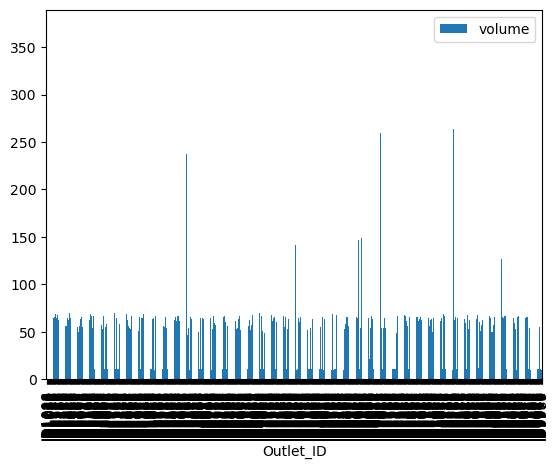

In [80]:
tot_volume_sold = pd.DataFrame(outlet_sales_db.groupby('Outlet_ID')['volume'].sum())
tot_volume_sold = tot_volume_sold.reset_index()

tot_volume_sold.plot(x='Outlet_ID',y='volume',kind='bar')

In [85]:
weekly_volume_sold = pd.DataFrame(outlet_sales_db.groupby(['Outlet_ID','week'])['volume'].sum())
weekly_volume_sold = weekly_volume_sold.reset_index()

weekly_volume_sold.volume.describe()

# weekly_volume_sold.plot(x='week',y='volume',kind='bar')

count    11412.000000
mean         4.618297
std          3.519154
min          0.400000
25%          2.600000
50%          5.000000
75%          5.800000
max         33.600000
Name: volume, dtype: float64

In [86]:
max_week_volume = pd.DataFrame(weekly_volume_sold.groupby('Outlet_ID')['volume'].max())
max_week_volume

,volume
Outlet_ID,
ID1008,1.0
ID1012,5.0
ID1024,5.0
ID1029,6.0
ID1036,6.0
...,...
ID9960,6.0
ID9971,1.0
ID9973,6.0


In [89]:
mean_week_volume = pd.DataFrame(weekly_volume_sold.groupby('Outlet_ID')['volume'].mean().round(2))
mean_week_volume.describe()

,volume
count,951.000000
mean,4.618381
std,3.460699
min,0.800000
25%,3.920000
50%,5.000000
75%,5.470000
max,30.900000


<AxesSubplot:ylabel='Count'>

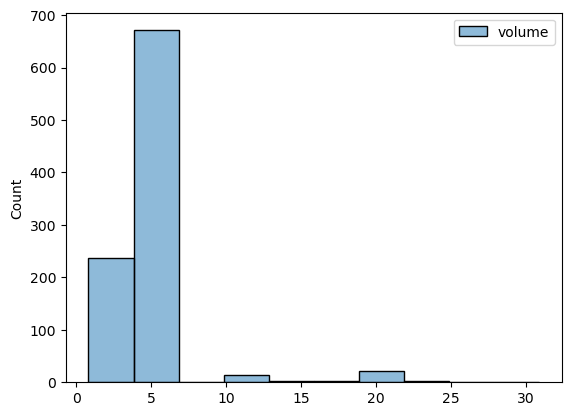

In [91]:
sns.histplot(data = mean_week_volume, bins=10)